In [9]:
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from core import DataLoader

import warnings
warnings.filterwarnings('ignore')

In [10]:
Poland = DataLoader('../data/poland')
Czech = DataLoader('../data/czech')
Netherlands = DataLoader('../data/netherlands')
Spain = DataLoader('../data/spain')

## Porównanie danych nt. bezrobocia z korekcją sezonowości i bez

<Axes: xlabel='Period', ylabel='Unemployment rate'>

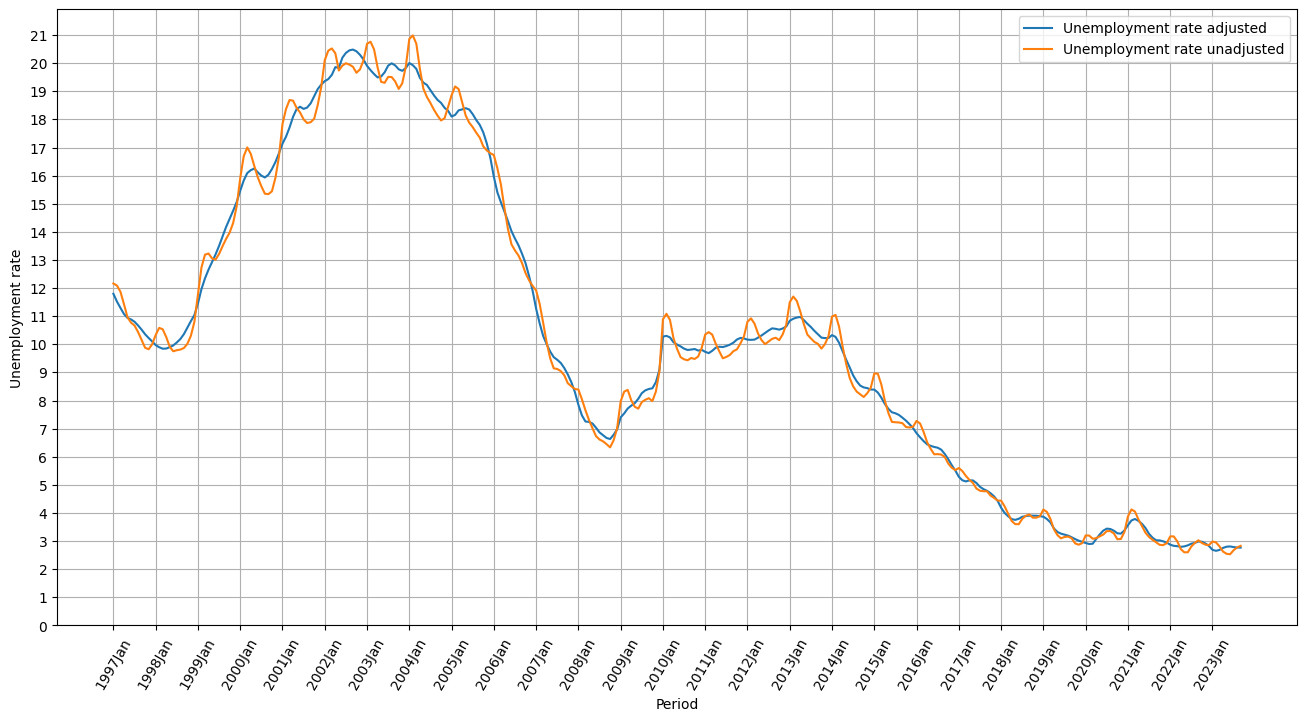

In [16]:
df_adjusted = Poland.unrate_adjusted_df.copy()
df_unadjusted = Poland.unrate_unadjusted_df.copy()
df = pd.DataFrame({
    'Unemployment rate adjusted': df_adjusted['Rate'].tolist(),
    'Unemployment rate unadjusted': df_unadjusted['Rate'].tolist()
    }, index=df_adjusted['Period'])

x_ticks = range(0, df_adjusted['Period'].count(), 12)
y_ticks = range(0, int(max(df_unadjusted['Rate'])) + 2)
df.plot(xticks=x_ticks, yticks=y_ticks, figsize=(16, 8), rot=60, grid=True, ylabel="Unemployment rate")

<Axes: xlabel='Period', ylabel='Unemployment rate'>

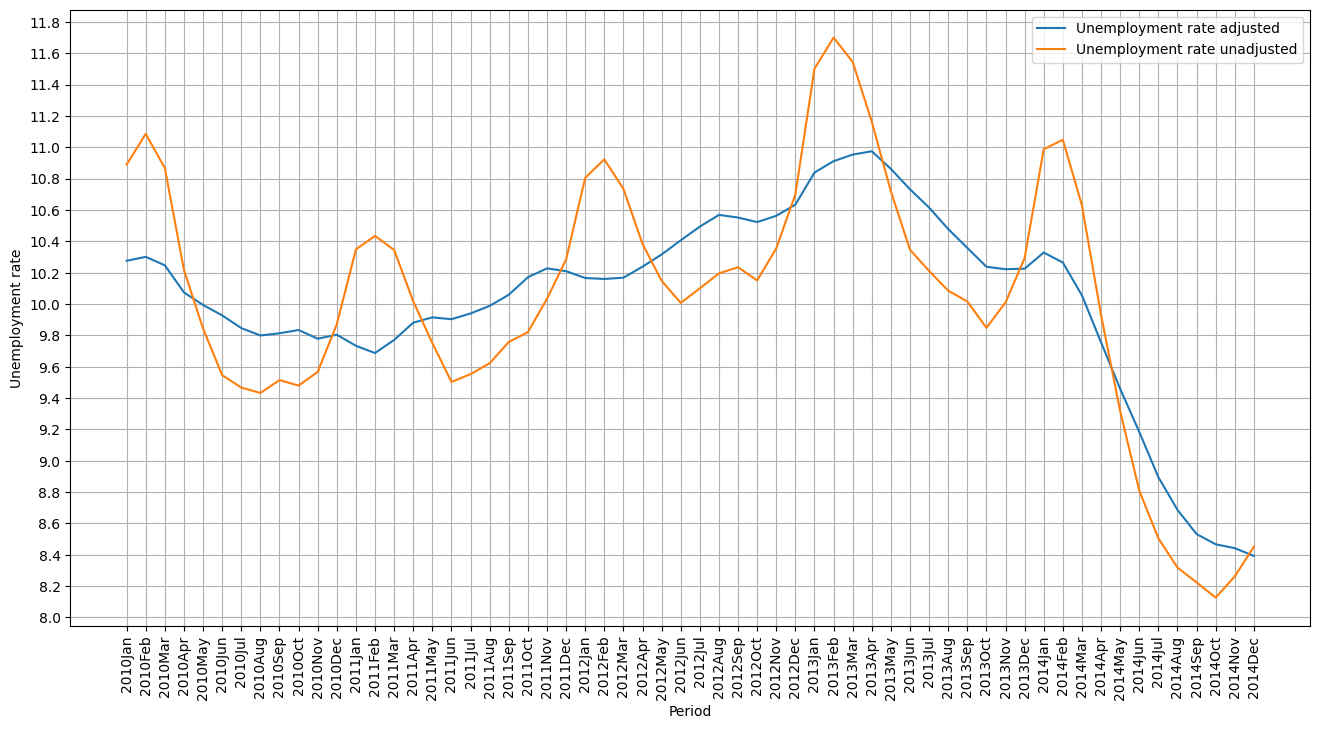

In [15]:
df_adjusted_period = df_adjusted[(df_adjusted['Date'] > dt.datetime(2010, 1, 1)) & (df_adjusted['Date'] < dt.datetime(2015, 1, 1))]
df_unadjusted_period = df_unadjusted[(df_unadjusted['Date'] > dt.datetime(2010, 1, 1)) & (df_unadjusted['Date'] < dt.datetime(2015, 1, 1))]
df = pd.DataFrame({
    'Unemployment rate adjusted': df_adjusted_period['Rate'].tolist(),
    'Unemployment rate unadjusted': df_unadjusted_period['Rate'].tolist()
    }, index=df_adjusted_period['Period'])

x_ticks = range(0, df_adjusted_period['Period'].count())
y_ticks = np.arange(int(min(df_unadjusted_period['Rate'])), max(df_unadjusted_period['Rate']) + 0.2, 0.2)
df.plot(xticks=x_ticks, yticks=y_ticks, figsize=(16, 8), rot=90, grid=True, ylabel="Unemployment rate")

## Porównanie zmian bezrobocia w Polsce ze zmianami w Czechach, Holandii i Hiszpanii

Używamy danych z korekcją sezonowości, ponieważ uwzględnione w niej czynniki, występujące powszechnie we wszystkich państwach, nie są interesujące z perspektywy porównań między państwami.

<Axes: xlabel='Period', ylabel='Unemployment rate'>

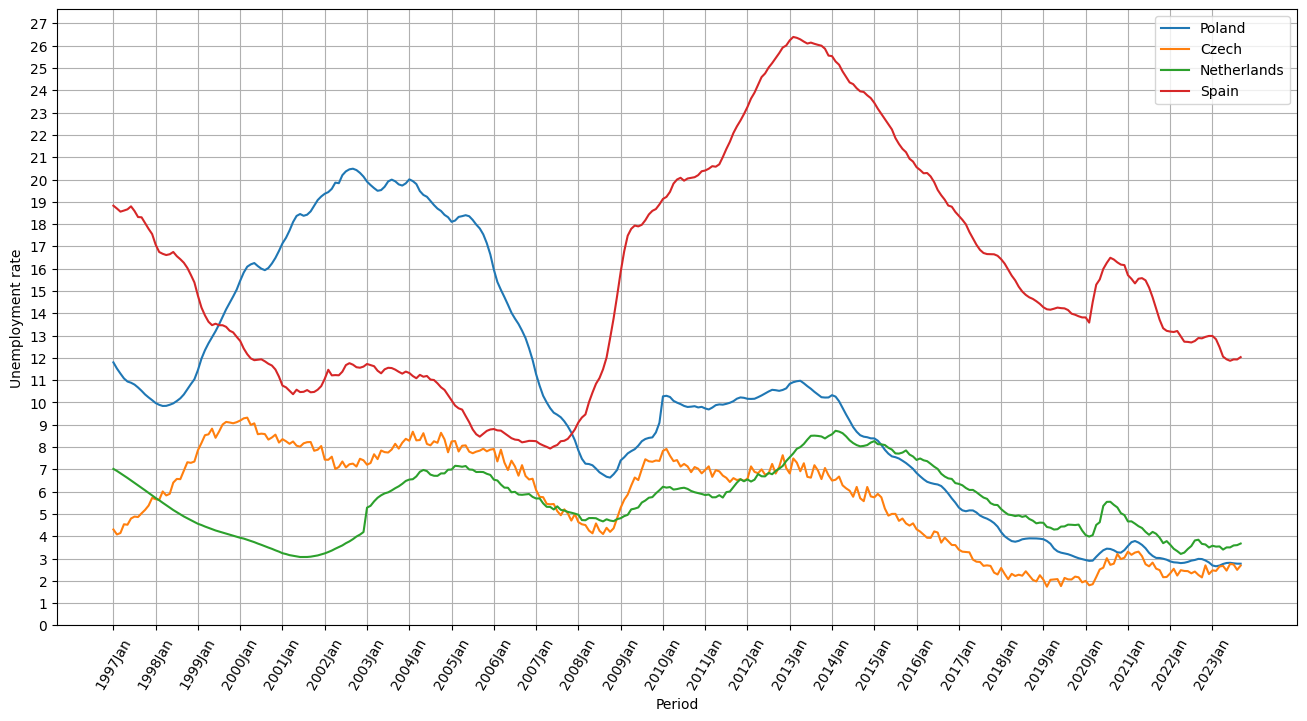

In [13]:
df_unrate_pl = Poland.unrate_adjusted_df.copy()
df_unrate_cz = Czech.unrate_adjusted_df.copy()
df_unrate_nl = Netherlands.unrate_adjusted_df.copy()
df_unrate_es = Spain.unrate_adjusted_df.copy()
df = pd.DataFrame({
    'Poland': df_unrate_pl['Rate'].tolist(),
    'Czech': df_unrate_cz['Rate'].tolist(),
    'Netherlands': df_unrate_nl['Rate'].tolist(),
    'Spain': df_unrate_es['Rate'].tolist()
    }, index=df_adjusted['Period'])

x_ticks = range(0, df_unrate_es['Period'].count(), 12)
y_ticks = range(0, int(max(df_unrate_es['Rate'])) + 2)
df.plot(xticks=x_ticks, yticks=y_ticks, figsize=(16, 8), rot=60, grid=True, ylabel="Unemployment rate")